# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [10]:
cities

['albany',
 'jamestown',
 'puerto natales',
 'gidole',
 'hermanus',
 'morehead city',
 'brades',
 'capinota',
 'vilyuchinsk',
 'haiku-pauwela',
 'avarua',
 'lihue',
 'ribeira grande',
 'waitangi',
 'port-aux-francais',
 'port mathurin',
 'petropavlovsk-kamchatsky',
 'tranovaho',
 'manadhoo',
 'afaahiti',
 'kongolo',
 'adamstown',
 'pamekasan',
 'kokofata',
 "port saint john's",
 'bethel',
 'enewetak',
 'selkirk',
 'diu',
 'laguna',
 'port-gentil',
 'ancud',
 'chadron',
 'flying fish cove',
 'edinburgh of the seven seas',
 'dudinka',
 'las vegas',
 'yuzhno-kurilsk',
 'blackmans bay',
 'grytviken',
 'margaret river',
 'east london',
 'tual',
 'howrah',
 'rancho palos verdes',
 'ulluaya',
 'tralee',
 'hamilton',
 'port alfred',
 'mount gambier',
 'puerto ayora',
 'changling',
 'mitu',
 'yellowknife',
 'summerville',
 'tolanaro',
 'lijiang',
 'college',
 'udachny',
 'prince george',
 'sechura',
 'ust-nera',
 'utrik',
 'ushuaia',
 'melfort',
 'vryburg',
 'ludington',
 'conde',
 'hard bargai

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"#LOOK HERE FOR ANY ERRORS#

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"#LOOK HERE FOR ANY ERRORS#
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)#LOOK HERE FOR ANY ERRORS#
        city_weather = response.json()#LOOK HERE FOR ANY ERRORS#

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]#LOOK HERE FOR ANY ERRORS#
        city_lng = city_weather["coord"]["lon"]#LOOK HERE FOR ANY ERRORS#
        city_max_temp = city_weather["main"]["temp_max"]#LOOK HERE FOR ANY ERRORS#
        city_humidity = city_weather["main"]["humidity"]#LOOK HERE FOR ANY ERRORS#
        city_clouds = city_weather["clouds"]["all"]#LOOK HERE FOR ANY ERRORS#
        city_wind = city_weather["wind"]["speed"]#LOOK HERE FOR ANY ERRORS#
        city_country = city_weather["sys"]["country"]#LOOK HERE FOR ANY ERRORS#
        city_date = city_weather["dt"]#LOOK HERE FOR ANY ERRORS#

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | gidole
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | morehead city
Processing Record 7 of Set 1 | brades
Processing Record 8 of Set 1 | capinota
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | haiku-pauwela
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | lihue
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | manadhoo
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | kongolo
Processing Reco

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)#LOOK HERE FOR ANY ERRORS#

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,277.55,54,1,0.45,US,1707082003
1,jamestown,42.0970,-79.2353,279.95,42,0,5.14,US,1707082123
2,puerto natales,-51.7236,-72.4875,298.40,31,75,11.83,CL,1707082125
3,gidole,5.6500,37.3667,292.24,49,98,0.36,ET,1707082126
4,hermanus,-34.4187,19.2345,294.71,88,4,0.69,ZA,1707082126


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,277.55,54,1,0.45,US,1707082003
1,jamestown,42.0970,-79.2353,279.95,42,0,5.14,US,1707082123
2,puerto natales,-51.7236,-72.4875,298.40,31,75,11.83,CL,1707082125
3,gidole,5.6500,37.3667,292.24,49,98,0.36,ET,1707082126
4,hermanus,-34.4187,19.2345,294.71,88,4,0.69,ZA,1707082126


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

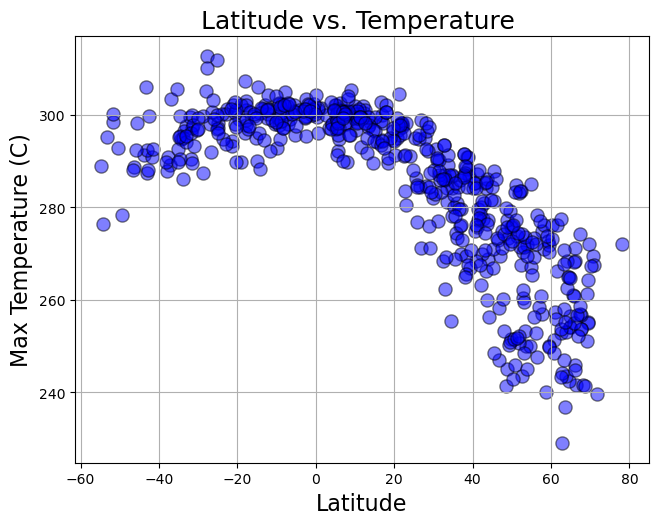

In [31]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
plt.scatter(lat, max_temp, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("Latitude vs. Temperature ", fontsize=18)# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

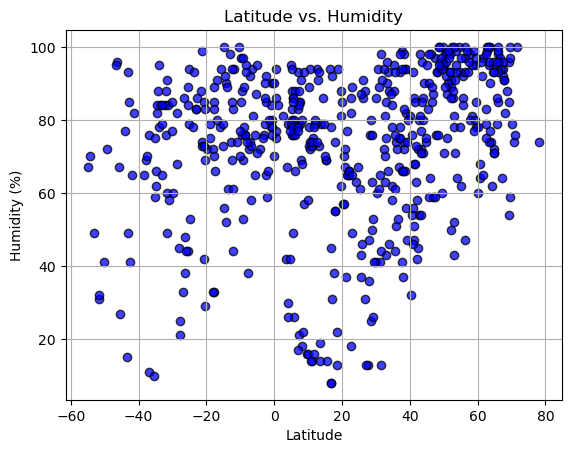

In [32]:
# Build the scatter plots for latitude vs. humidity
hummidity = city_data_df['Humidity']
plt.scatter(lat, hummidity, marker="o", color="blue", edgecolors="black", alpha=0.75)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

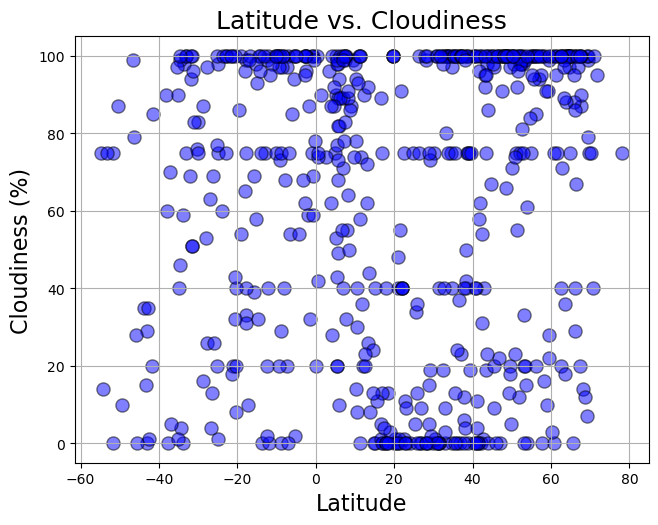

In [33]:
# Build the scatter plots for latitude vs. cloudiness
clouds = city_data_df["Cloudiness"] 

plt.scatter(lat, clouds, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("Latitude vs. Cloudiness", fontsize=18)
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

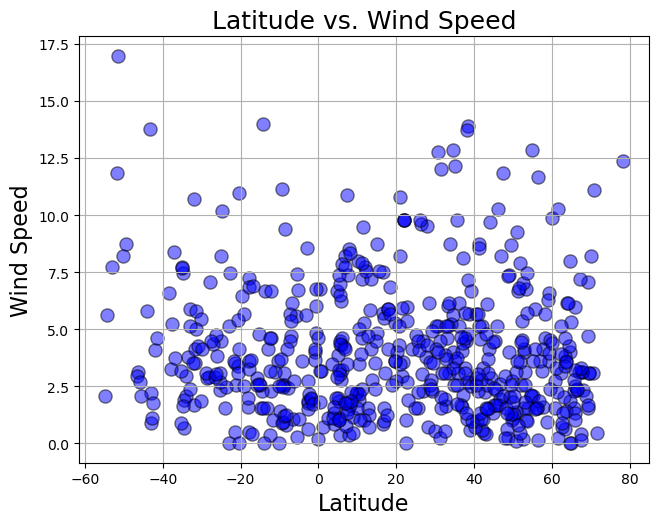

In [34]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lat, wind_speed, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Wind Speed", fontsize=16)
plt.title("Latitude vs. Wind Speed", fontsize=18)# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots # YOUR CODE HERE
def linear_regression_and_plot(x_values, y_values, xlabel="X-axis", ylabel="Y-axis", title="Linear Regression Plot"):

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Plot the data points
    plt.scatter(x_values, y_values, color='blue', label='Actual data')

    # Plot the regression line
    plt.plot(x_values, regress_values, color='red', linewidth=2, label='Linear Regression')

    # Customize the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title}\nSlope: {slope:.2f}, Intercept: {intercept:.2f}, R-value: {r_value:.2f}")
    plt.legend()

    # Display the plot
    plt.show()

# YOUR CODE HERE

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,277.55,54,1,0.45,US,1707082003
1,jamestown,42.0970,-79.2353,279.95,42,0,5.14,US,1707082123
3,gidole,5.6500,37.3667,292.24,49,98,0.36,ET,1707082126
5,morehead city,34.7229,-76.7260,284.17,62,0,4.02,US,1707081853
6,brades,16.7918,-62.2106,299.91,78,75,1.54,MS,1707082127


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,298.40,31,75,11.83,CL,1707082125
4,hermanus,-34.4187,19.2345,294.71,88,4,0.69,ZA,1707082126
7,capinota,-17.7167,-66.2333,297.82,33,33,7.23,BO,1707082127
10,avarua,-21.2078,-159.7750,302.18,74,20,2.57,CK,1707082128
13,waitangi,-43.9535,-176.5597,291.38,77,35,5.82,NZ,1707082129


###  Temperature vs. Latitude Linear Regression Plot

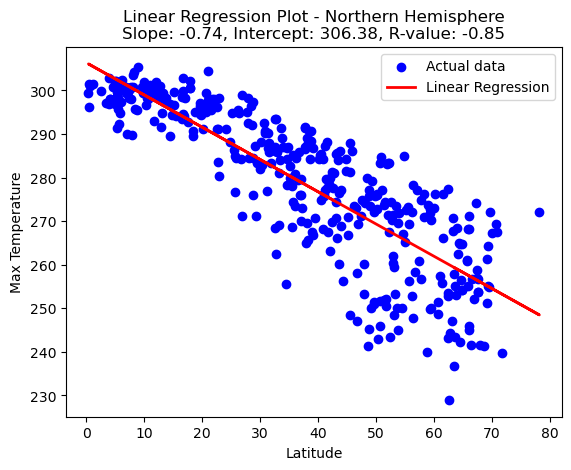

In [42]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the linear_regression_and_plot function
linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Max Temperature", title="Linear Regression Plot - Northern Hemisphere")# YOUR CODE HERE

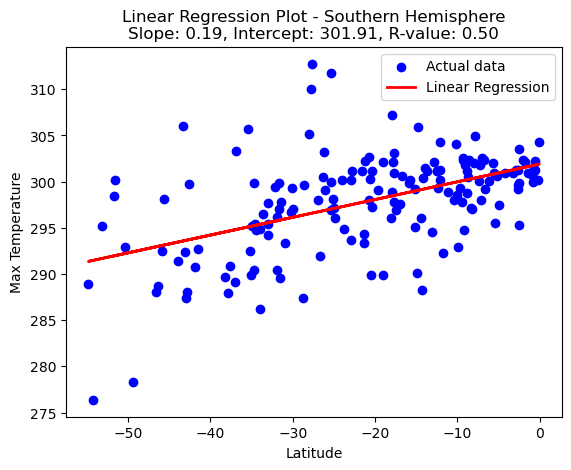

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the linear_regression_and_plot function
linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Max Temperature", title="Linear Regression Plot - Southern Hemisphere")# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

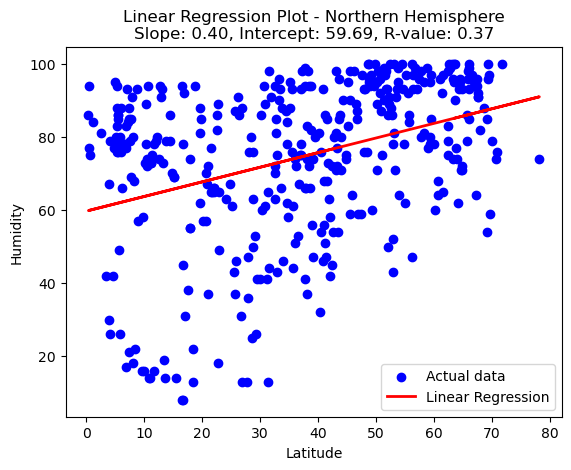

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']# YOUR CODE HERE
y_values = northern_hemi_df['Humidity']

linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Humidity", title="Linear Regression Plot - Northern Hemisphere")

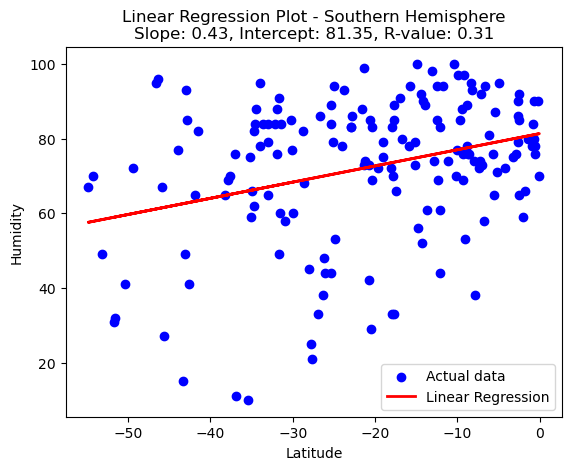

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']# YOUR CODE HERE
y_values = southern_hemi_df['Humidity']

linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Humidity", title="Linear Regression Plot - Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

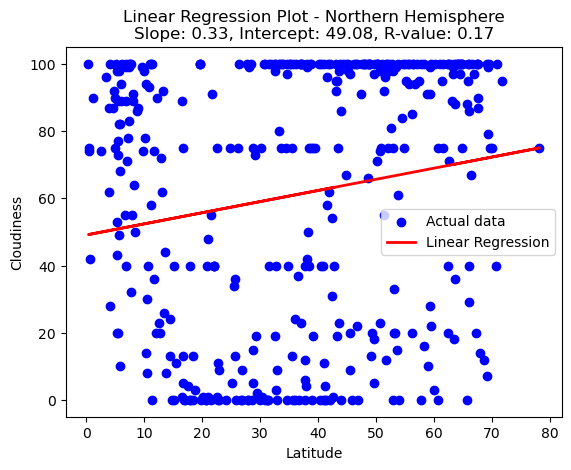

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']# YOUR CODE HERE
y_values = northern_hemi_df['Cloudiness']

linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Cloudiness", title="Linear Regression Plot - Northern Hemisphere")

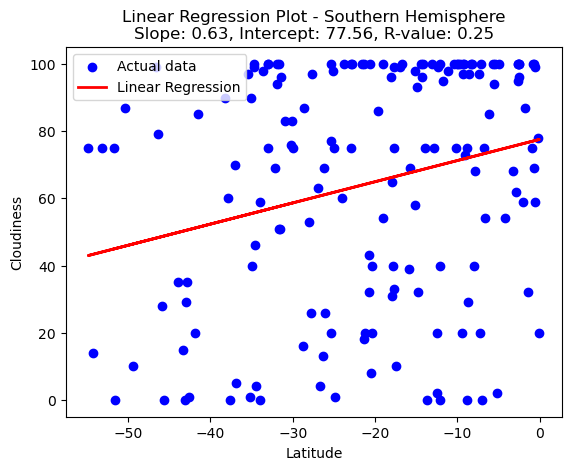

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']# YOUR CODE HERE
y_values = southern_hemi_df['Cloudiness']

linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Cloudiness", title="Linear Regression Plot - Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

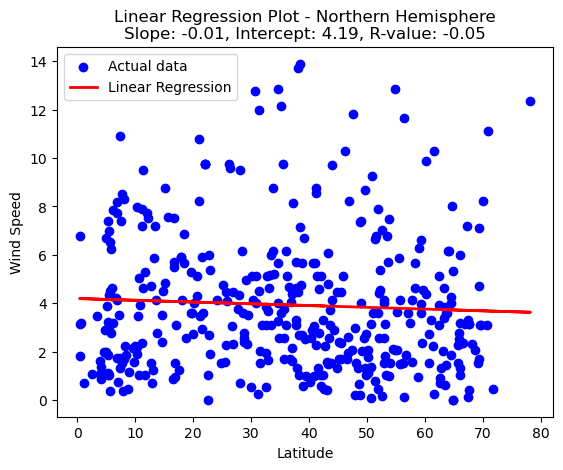

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']# YOUR CODE HERE
y_values = northern_hemi_df['Wind Speed']

linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Wind Speed", title="Linear Regression Plot - Northern Hemisphere")

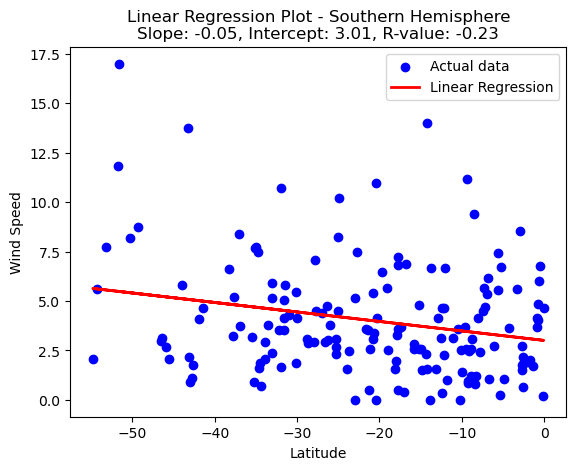

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']# YOUR CODE HERE
y_values = southern_hemi_df['Wind Speed']

linear_regression_and_plot(x_values, y_values, xlabel="Latitude", ylabel="Wind Speed", title="Linear Regression Plot - Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE